# Heart Disease Prediction ❤️‍🔥
### We will create an Artificial Neural Network and train it on the Heart Disease Dataset to predict the possibility of a heart disease
We will also first implement it using multiple ML algorithms like **Logistic Regression** ,**SVM**, **K-NN**, **Naive Bayes**, **Gradient Boosting** and **Ada Boost**, and compare the performance with our **Deep Learning** model.

In [1]:
import pandas as pd #To read the CSV file
import numpy as np # Numerical calculations

In [2]:
df= pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### A description of Dataset:
**ATTRIBUTES:**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [5]:
# Number of unique values for each attributes
df.nunique().sum

<bound method Series.sum of age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64>

In [6]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values in the dataset, that's a good thing.

# EDA and Visualizations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

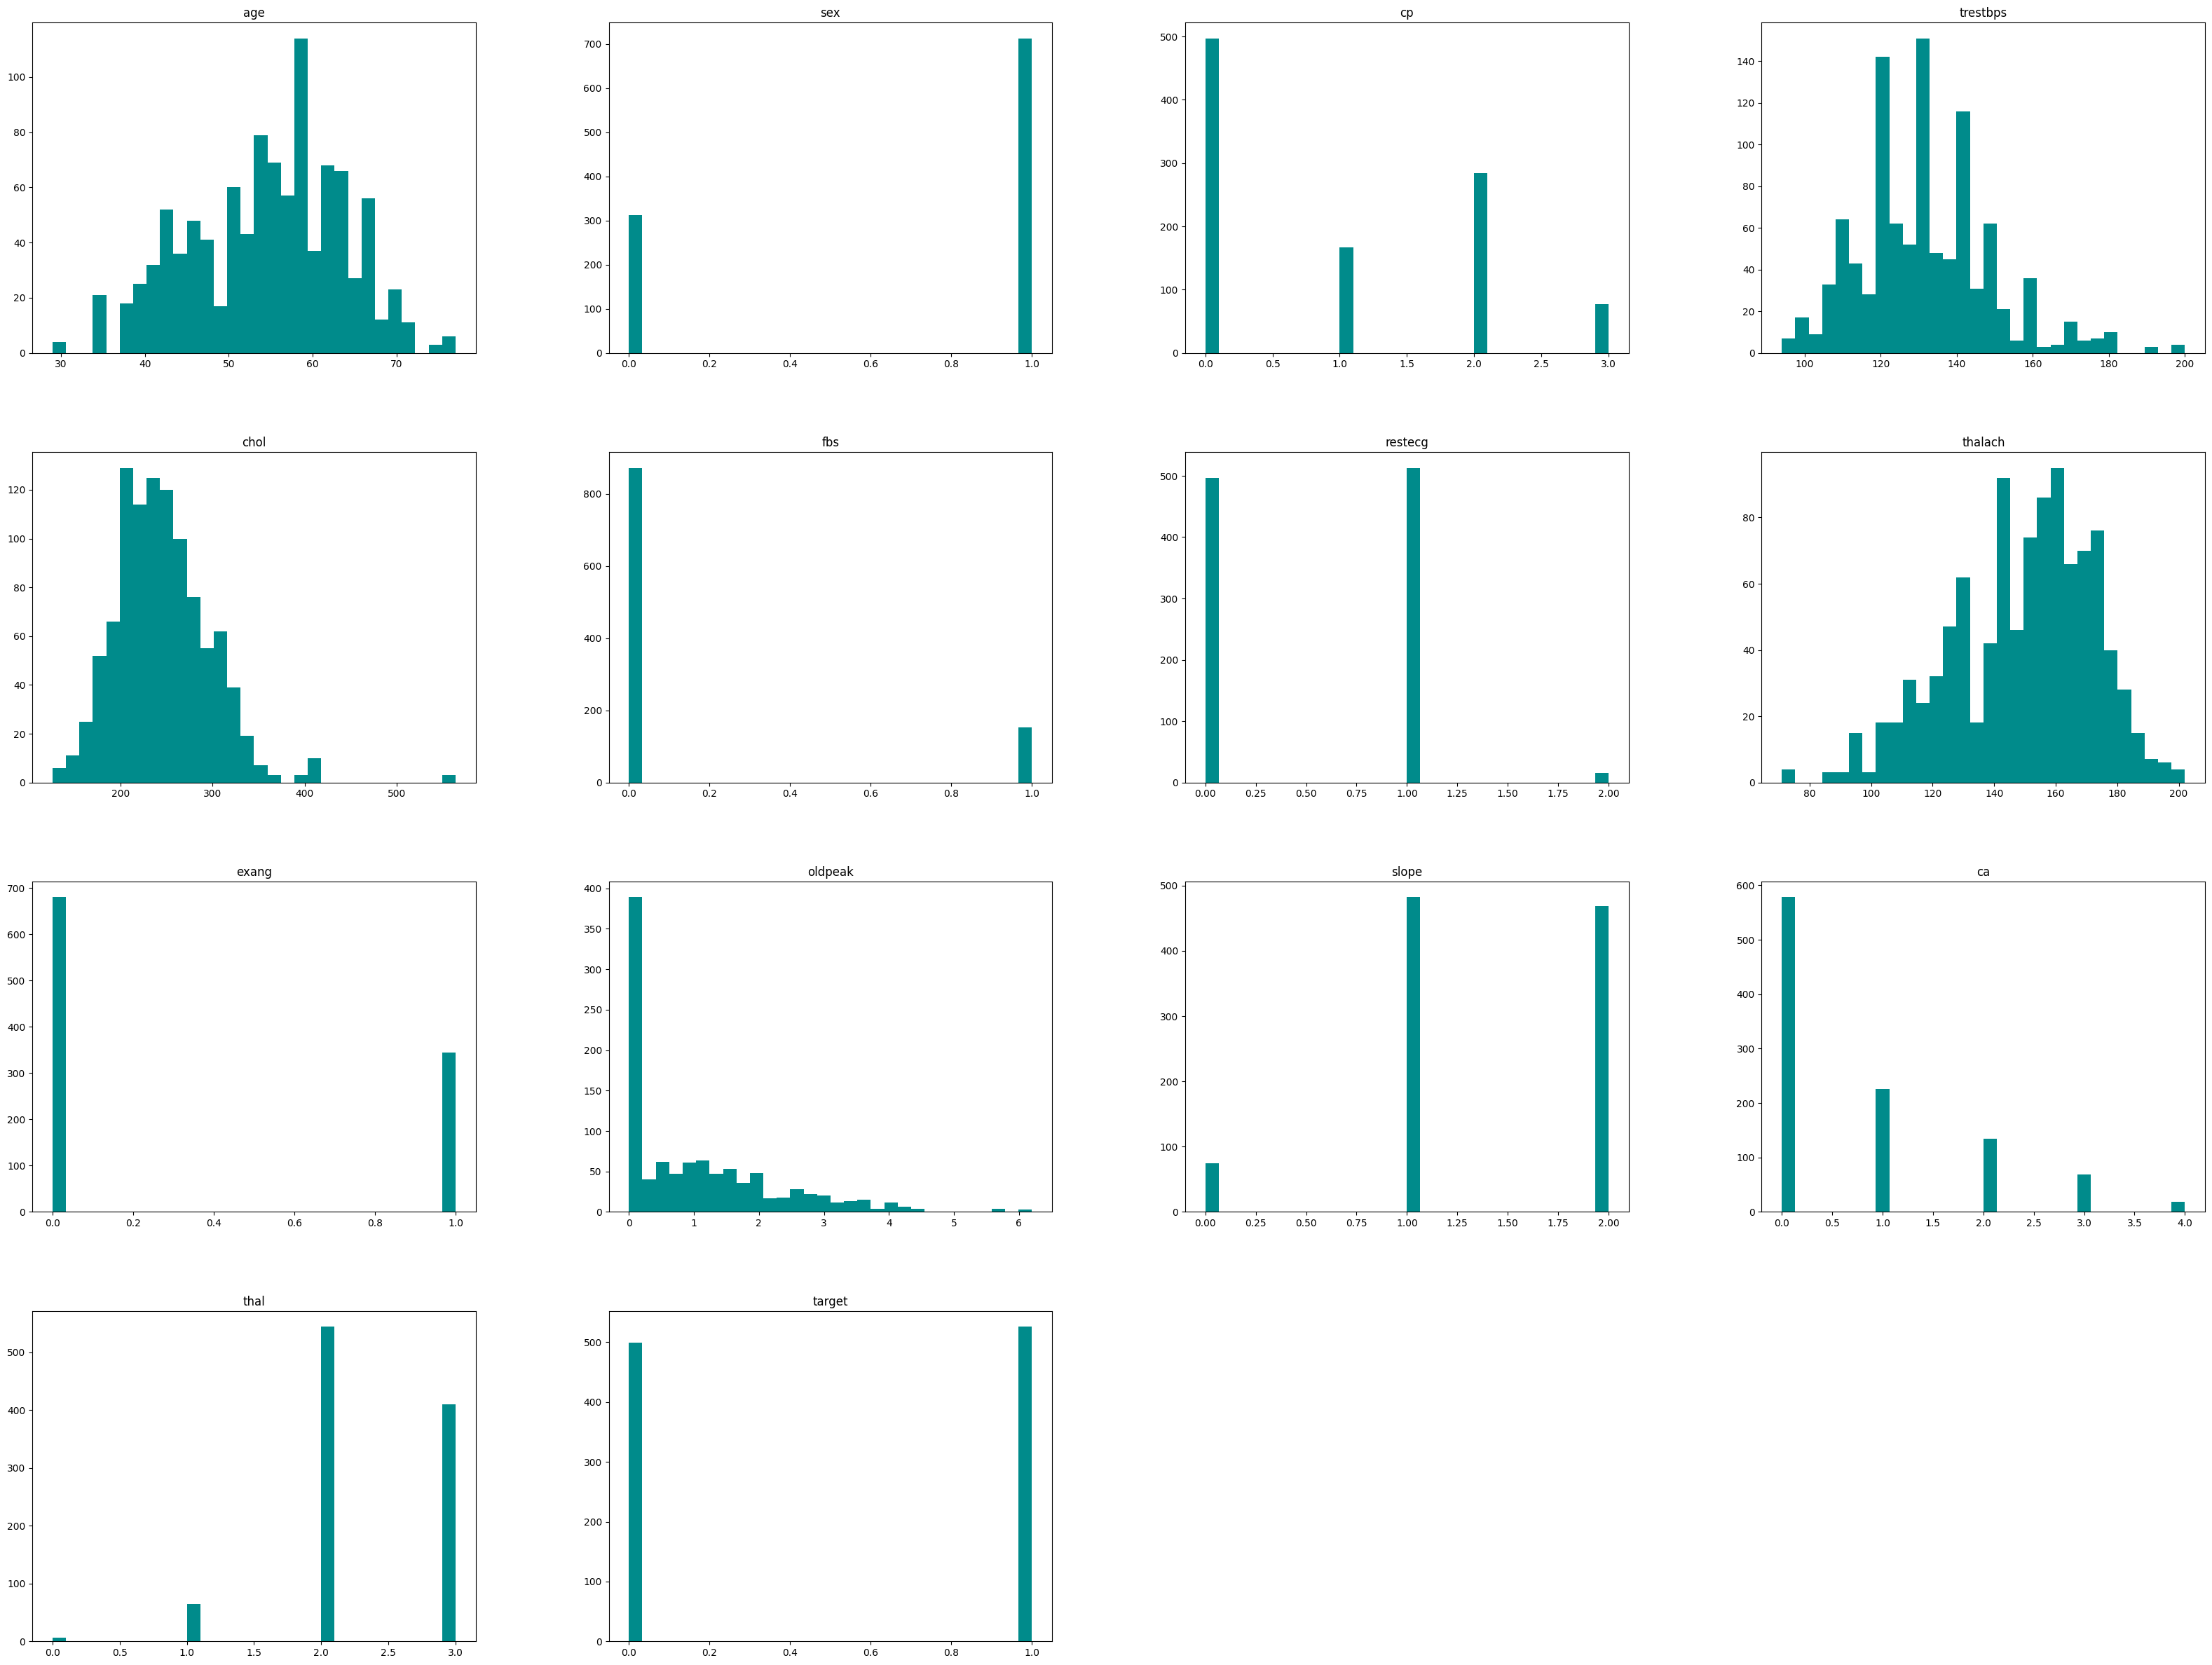

In [8]:
# Histogram to check the distribution of each attribute

df.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = df.columns[0:], color= "DarkCyan", grid = False)
plt.show()

A fairly distributed dataset, with categorical values like sex and chest pain already encoded. That's a good news. We won't have to do much changes in the dataset!
Let's check the correlation of the attributes.

<Axes: >

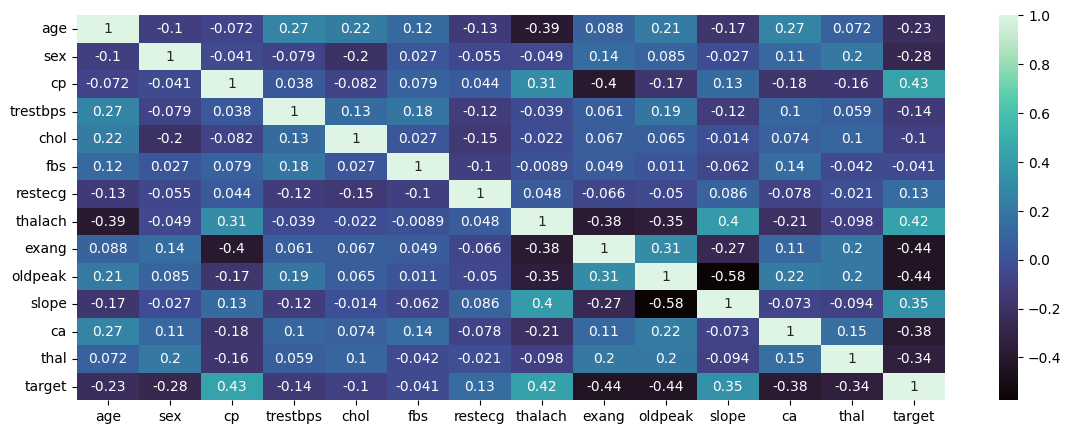

In [9]:
df_corr= df.corr()
plt.figure(figsize = (14,5))
sns.heatmap(df_corr,annot=True,cmap = 'mako')

## Outlier check:

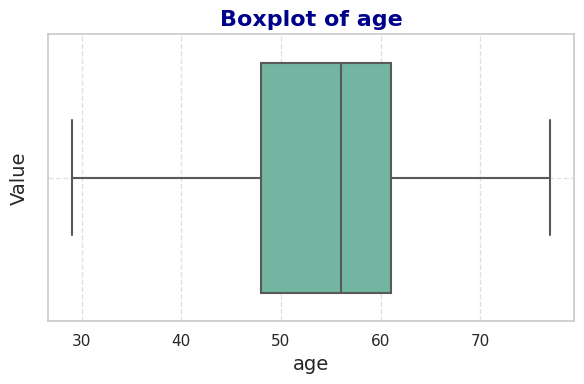

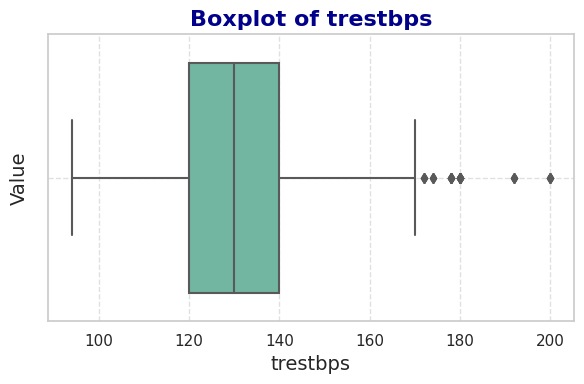

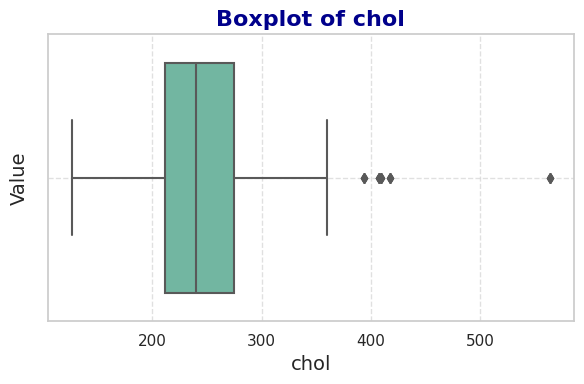

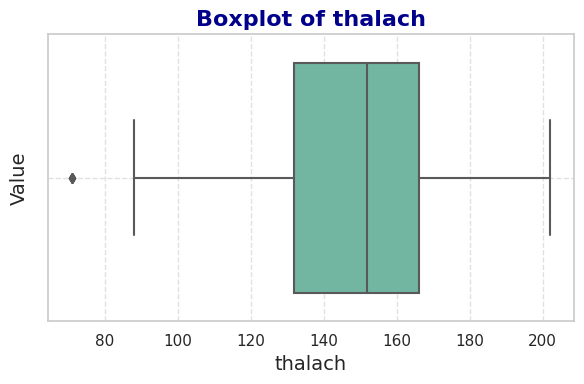

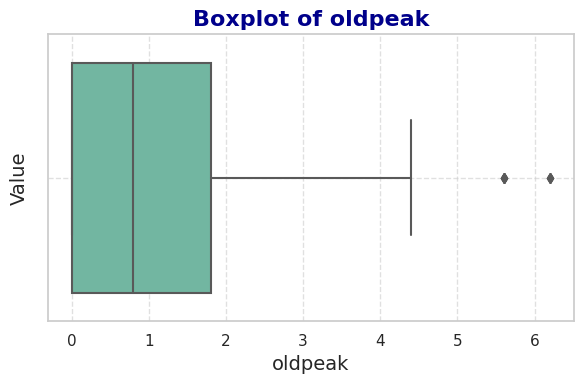

In [10]:
numerical_columns= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# List of (by default) non-categorical attributes

#Boxplot

sns.set(style="whitegrid")  

# Iterate through the numerical columns and create a boxplot for each one
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'Boxplot of {column}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()  
    plt.show()

A few outliers, but not too significant, they will be resolved after we do scaling

# Preparing the dataset for training
* train-test split
* scaling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X= df.drop(['target'], axis=1)
y= df['target']

In [13]:
# Scaling
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [14]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

# Model training
We will be first trying basic ml algorithms, this is a binary classification problem so the most approproate models would be:
* **Logistic Regression**
* **SVM**
* **K-NN**
* **Naive Bayes**
* **Gradient Boosting**
* **Ada Boost**

And finally:
**Artificial Neural Network (ANN)**

We are using multiple algorithms, so it would be better to just train the model on each of these ml algorithms at the same time to get their accuracy scores, instead of going through each one by one, and then we will do it using ANN and compare it with the results of the test.

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_results.mean()

# Print model performance comparison
for name, result in results.items():
    print(f"{name}: {result:.4f} accuracy")

Logistic Regression: 0.8488 accuracy
SVM: 0.9207 accuracy
Gradient Boosting: 0.9561 accuracy
AdaBoost: 0.9122 accuracy
KNN: 0.8415 accuracy
Naive Bayes: 0.8317 accuracy


So, the best accuracy we got is from Gradient Boosting, with a cross-validation score of 0.956, which is already quite good. Let's see if using an ANN could help make it even better:

## Creating our ANN and training it:

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [17]:
# Create the ANN model
model = Sequential()

# Input layer (with the same number of nodes as features in the dataset)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer (since it's binary classification, we use 1 unit with sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7621 - loss: 0.5653 - val_accuracy: 0.8146 - val_loss: 0.4395
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3767 - val_accuracy: 0.8244 - val_loss: 0.4106
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3463 - val_accuracy: 0.8195 - val_loss: 0.4041
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - loss: 0.3114 - val_accuracy: 0.8195 - val_loss: 0.3924
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8879 - loss: 0.2835 - val_accuracy: 0.8195 - val_loss: 0.3800
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9086 - loss: 0.2683 - val_accuracy: 0.8341 - val_loss: 0.3628
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 0.2242 - val_accuracy: 0.8293 - val_loss: 0.3577
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9096 - loss: 0.2198 - val_accuracy: 0.8293 - val_loss:

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.1428 
Test Accuracy: 0.9854


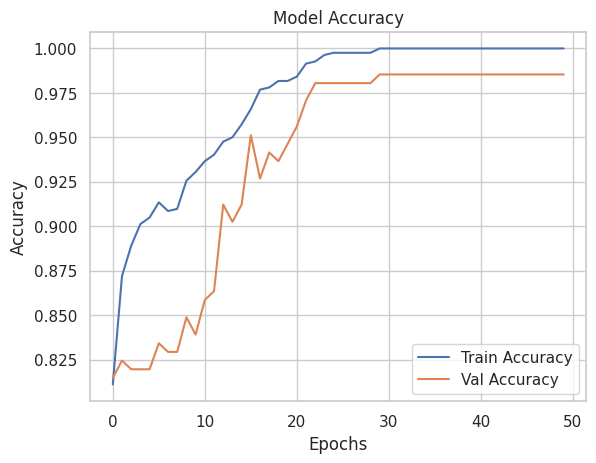

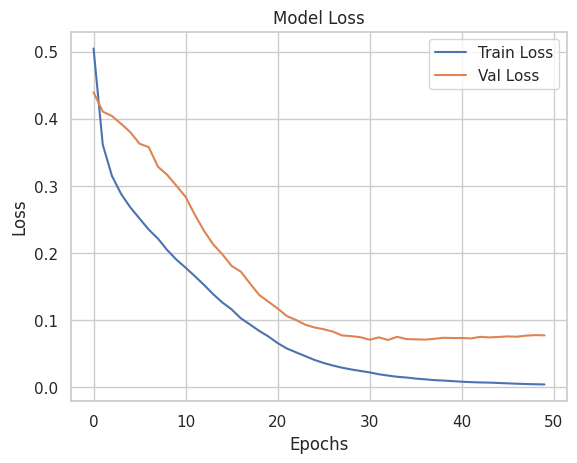

In [20]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**We reached an accuracy of 0.985 for our validation data, and 1 for our training data.**
This is a significant growth from our previous best score of **0.95** from our **Gradient Boosting** algorithm.

## Model Evaluation:

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


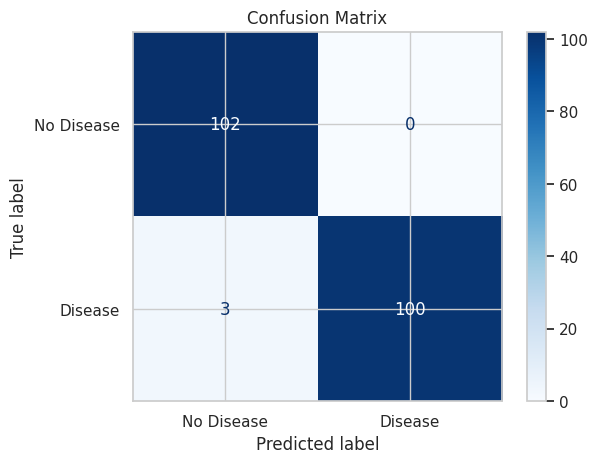

In [22]:
# Confusion Matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [23]:
# Classification report

report = classification_report(y_test, y_pred, target_names=["No Disease", "Disease"])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.97      1.00      0.99       102
     Disease       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


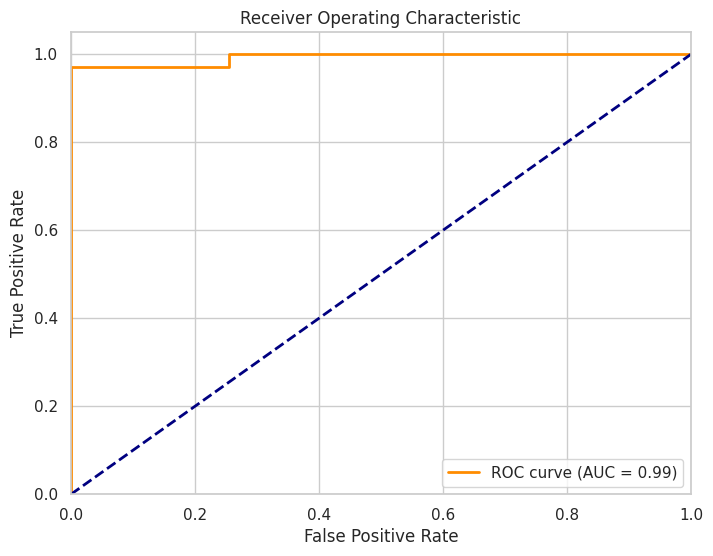

In [24]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = model.predict(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion:
Through our ANN model, we succeeded in achieving almost perfect prediction of Heart Disease possibility. The results are very good as well, with a 98.5% accuracy!

Thank you for checking out this notebook!!